<a href="https://colab.research.google.com/github/aditimankar10/Feature-Engineering/blob/main/HandlingMissingValuesFeartureEngg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#### 1)Mean/Median/Mode Imputation
#It is easy to implement and fastest way to obtain a complete dataset
#But, it imapcts the correlation and also distortion is in the original variance

In [2]:
import pandas as pd

In [3]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic (3).csv


In [4]:
df=pd.read_csv("titanic.csv", usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [6]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [7]:
median = df.Age.median()
median

28.0

In [8]:
impute_nan(df, 'Age', median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [9]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

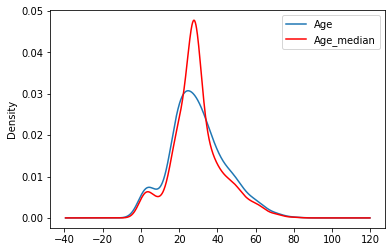

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best');

In [12]:
#### 2)Random Sample Imputation
#It consist of random observation from dataset and use the random observation to replace the nan value.
#There is less distortion in variance in Random Sample imputation but it cannot be used everywork.
#It assumes that data is missing completely at random.

In [13]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [15]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [16]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [17]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"random"]=df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [18]:
median = df.Age.median()
median

28.0

In [19]:
impute_nan(df,"Age",median)
df.head()

,Survived,Age,Fare,Age_median,Agerandom,Age_random
0,0,22.0,7.2500,22.0,22.0,NaN
1,1,38.0,71.2833,38.0,38.0,NaN
2,1,26.0,7.9250,26.0,26.0,NaN
3,1,35.0,53.1000,35.0,35.0,NaN
4,0,35.0,8.0500,35.0,35.0,NaN


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

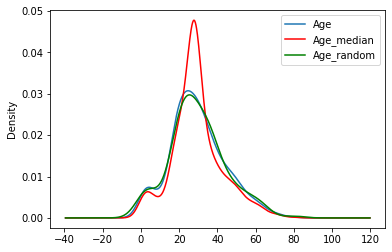

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [22]:
#### 3)Capturing NAN values with a new feature
#Works when the data is not missing completely at random.
#creates addition features which can leads to curse of dimentionality

In [23]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [24]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [25]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [26]:
df.Age.median()

28.0

In [27]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [28]:
#### 4)End of Distribution Imputation
#MCAR

In [29]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


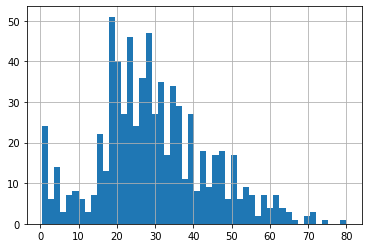

In [30]:
df.Age.hist(bins=50);

In [31]:
extreme=df.Age.mean()+3*df.Age.std()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


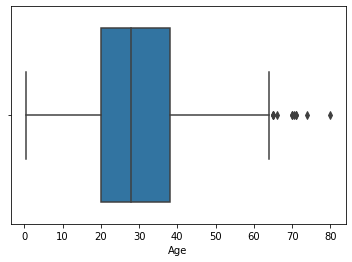

In [32]:
import seaborn as sns
sns.boxplot('Age',data=df);

In [33]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [34]:
impute_nan(df,'Age',df.Age.median(),extreme)
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


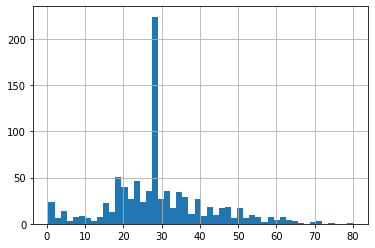

In [35]:
df['Age'].hist(bins=50);

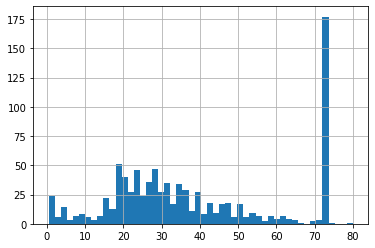

In [36]:
df['Age_end_distribution'].hist(bins=50);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


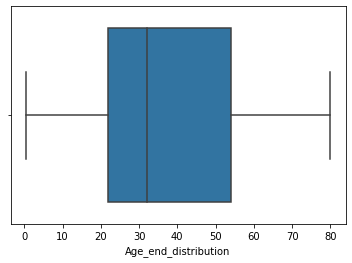

In [37]:
sns.boxplot('Age_end_distribution',data=df);

In [38]:
#### 5)Arbitrary Value Imputation 
 #It is use to find out the important of missing value.Rarely use.

In [39]:
import pandas as pd
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [40]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

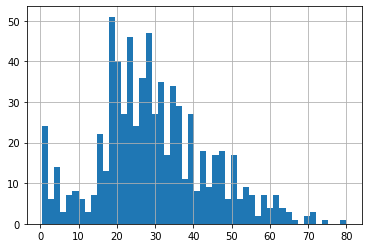

In [41]:
df['Age'].hist(bins=50);